# Recognize Flowers using Transfer Learning

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # The %tensorflow_version magic only works in colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt

In [32]:
!pip install tensorflow_hub

In [0]:
import tensorflow_hub as hub

In [34]:
tf.__version__

'2.1.0'

In [0]:
import pandas as pd

# Increase precision of presented data for better side-by-side comparison
pd.set_option("display.precision", 8)

## Setup Input Pipeline

Download the flowers dataset.

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import dataset



In [0]:
data_root = ("/content/drive/My Drive/Crop dataset")

In [0]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL, 
                                   fname="flower_photos.tgz", 
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

Use `ImageDataGenerator` to rescale the images.

Create the train generator and specify where the train dataset directory, image size, batch size.

Create the validation generator with similar approach as the train generator with the flow_from_directory() method.

In [39]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)

datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="validation", 
    shuffle=True,
    target_size=IMAGE_SHAPE
)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="training", 
    shuffle=True,
    target_size=IMAGE_SHAPE)

Found 21 images belonging to 12 classes.
Found 104 images belonging to 12 classes.


In [40]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 12))

Save the labels in a file which will be downloaded later.

In [41]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'cotton': 0, 'gram': 1, 'jowar': 2, 'jute': 3, 'maize': 4, 'onion': 5, 'pea': 6, 'pumpkin': 7, 'rice': 8, 'sugarcane': 9, 'sunflower': 10, 'wheat': 11}


In [42]:
!cat labels.txt

cotton
gram
jowar
jute
maize
onion
pea
pumpkin
rice
sugarcane
sunflower
wheat

In [0]:
IMAGE_SIZE = 224

self model code

In [45]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   multiple                  2257984   
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  15372     
Total params: 2,273,356
Trainable params: 15,372
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [47]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

hist = model.fit(
    train_generator, 
    epochs=100,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch).history

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 4.0 steps, validate for 1.0 steps
Epoch 1/100
4/4 [==============================] - 5s 1s/step - loss: 3.0983 - acc: 0.0865 - val_loss: 2.2633 - val_acc: 0.1429
Epoch 2/100
4/4 [==============================] - 2s 547ms/step - loss: 2.3917 - acc: 0.2788 - val_loss: 1.9693 - val_acc: 0.3333
Epoch 3/100
4/4 [==============================] - 2s 557ms/step - loss: 2.0201 - acc: 0.3269 - val_loss: 1.6990 - val_acc: 0.4286
Epoch 4/100
4/4 [==============================] - 2s 554ms/step - loss: 1.5231 - acc: 0.5192 - val_loss: 1.5142 - val_acc: 0.6190
Epoch 5/100
4/4 [==============================] - 2s 569ms/step - loss: 1.2090 - acc: 0.6250 - val_loss: 1.3287 - val_acc: 0.5714
Epoch 6/100
4/4 [==============================] - 2s 559ms/step - loss: 0.9122 - acc: 0.7115 - val_loss: 1.1470 - val_acc: 0.6667
Epoch 7/100
4/4 [==============================] - 2s 558ms/step - loss: 0.8175 - acc: 0.7596 - val_loss: 1.0283 - val_acc: 0.6667
Epoch 8/100
4/4 [=========================

In [48]:
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


1/1 [==============================] - 0s 441ms/step - loss: 0.3771 - acc: 0.8571


In [50]:
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

Final loss: 0.38
Final accuracy: 85.71%


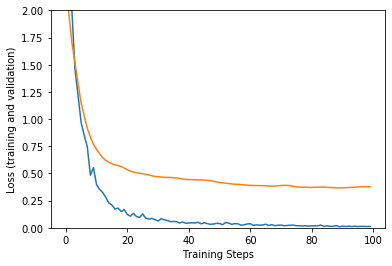

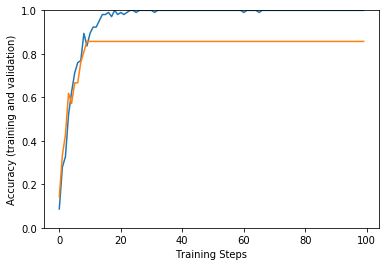

In [51]:

plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

In [52]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)

print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (21, 224, 224, 3)


In [53]:

dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Cotton' 'Gram' 'Jowar' 'Jute' 'Maize' 'Onion' 'Pea' 'Pumpkin' 'Rice'
 'Sugarcane' 'Sunflower' 'Wheat']


In [54]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (21, 12)


In [55]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['Pea' 'Rice' 'Pumpkin' 'Pea' 'Rice' 'Jowar' 'Maize' 'Wheat' 'Sunflower'
 'Cotton' 'Wheat' 'Sunflower' 'Sugarcane' 'Wheat' 'Sugarcane' 'Pea' 'Rice'
 'Pumpkin' 'Rice' 'Pumpkin' 'Gram']


In [56]:
tf_model_predictions = model.predict(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (21, 12)


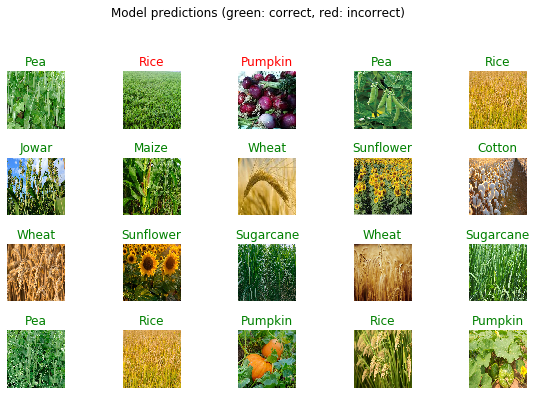

In [57]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(20):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

## Convert to TFLite

Saved the model using `tf.saved_model.save` and then convert the saved model to a tf lite compatible format.

In [58]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: save/fine_tuning/assets


INFO:tensorflow:Assets written to: save/fine_tuning/assets


Download the converted model and labels

In [0]:
from google.colab import files

files.download('model.tflite')
files.download('labels.txt')